<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
[[2.16176350e+01 1.65221120e+05 1.21405377e+05 1.31871878e+03
  1.52251955e+01]]
[-2641372.66730143]
MAE: 81257.55795855941
MSE: 10169125565.897606
RMSE: 100842.08231635048
R2: 0.9185060945363622


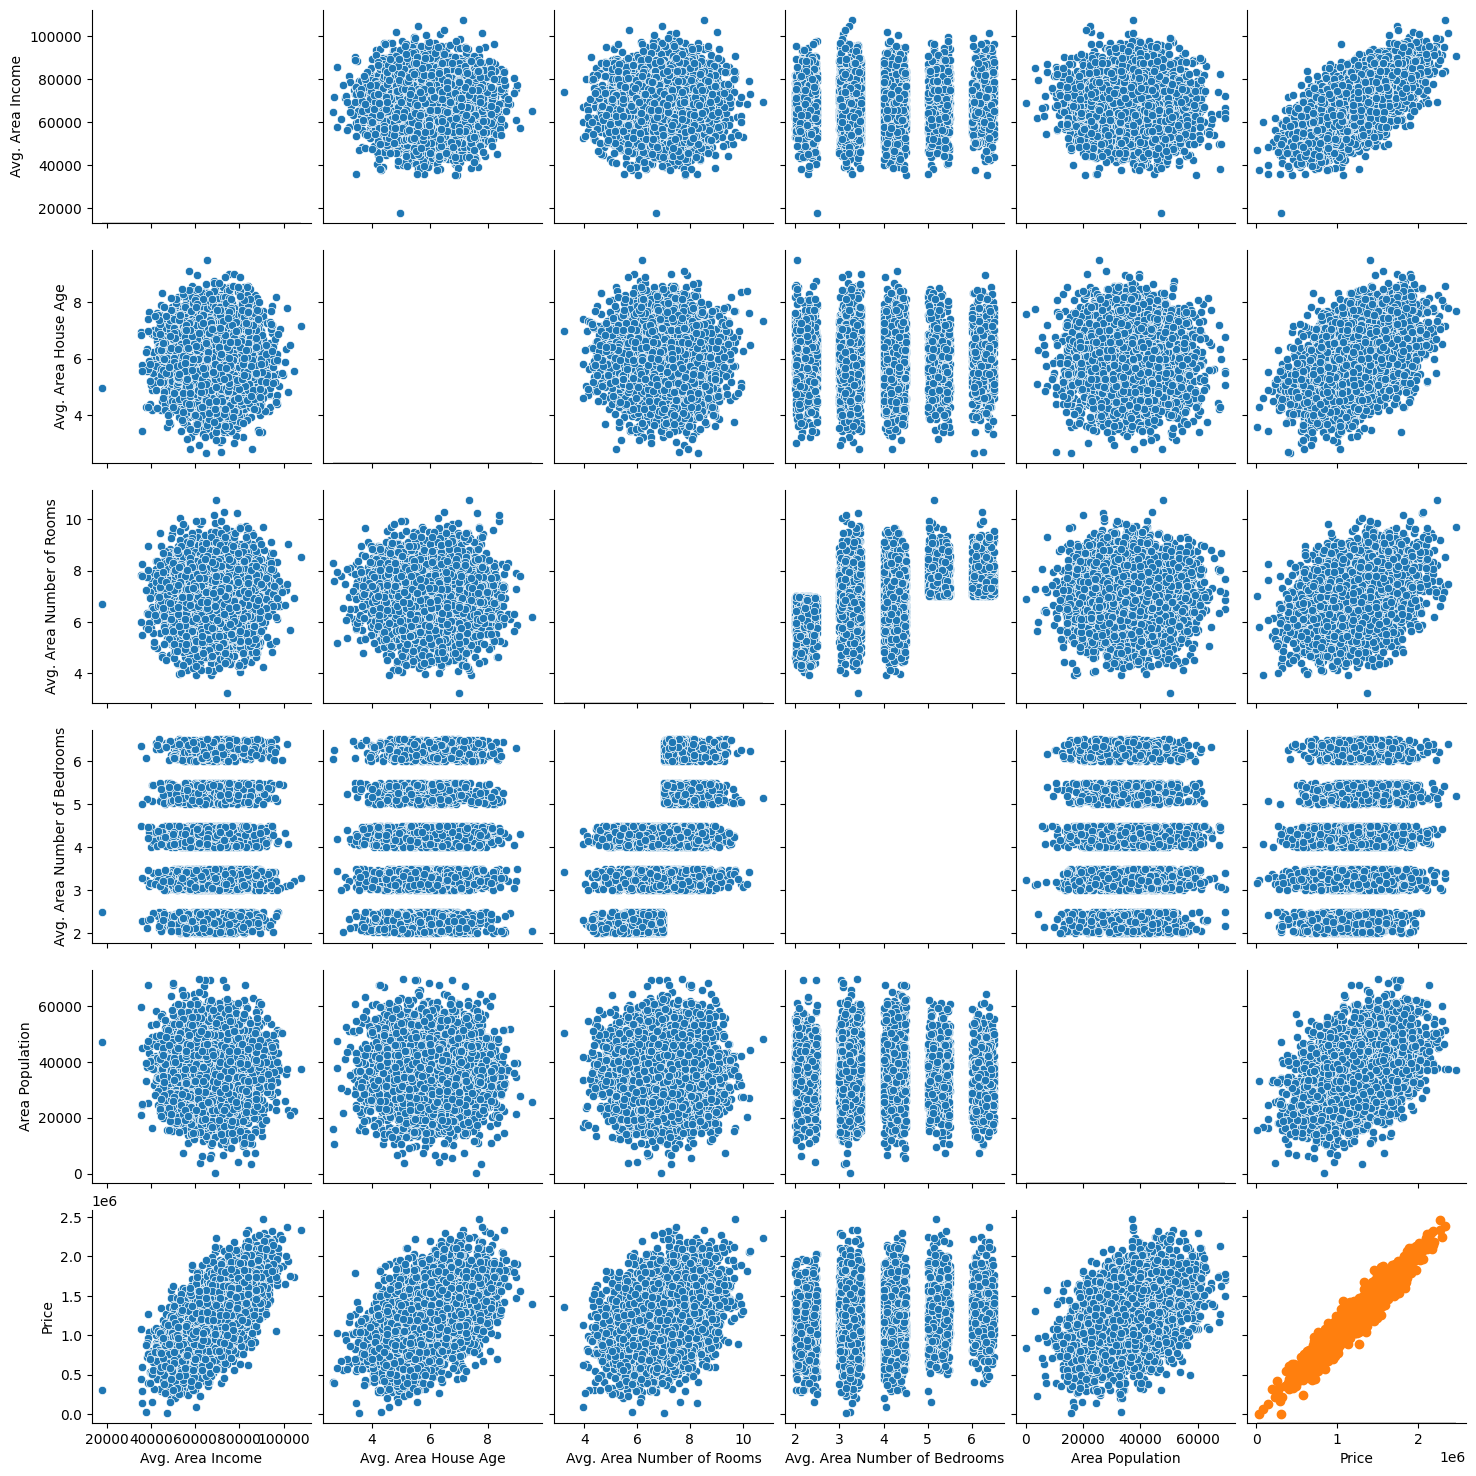

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # data visualization library based on matplotlib with attractuve statistical graphics

USAHousing = pd.read_csv('USA_Housing.csv')

USAHousing.head()

USAHousing.info() 

# Analyse the data
sns.pairplot(USAHousing) # compare chaque donnee avec une autre [chaque paire de donnees]

X = USAHousing[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms',
                'Area Population']]
Y = USAHousing[['Price']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x_train,y_train)

print(regressor.coef_)
print(regressor.intercept_)

coeff_df = pd.DataFrame(regressor.coef_[0],X.columns,columns=['Coefficient'])
coeff_df
"""                             Coefficient
Avg. Area Income	            21.617635            Si le Avg. Area Income augmente d'une unite,
                                                        le prix de la maison augmentera de 21.617635 
Avg. Area House Age	            165221.119872       Idem
Avg. Area Number of Rooms   	121405.376596       Idem
Avg. Area Number of Bedrooms	1318.718783         Idem
Area Population	                15.225196           Idem       """
                        
y_predict = regressor.predict(x_test) 
plt.scatter(y_test, y_predict) # y_predict en y, y_test en x: plus la tendance est lineaire, plus la prediction est bonne

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_predict))
print('MSE:', metrics.mean_squared_error(y_test,y_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2:',metrics.r2_score(y_test,y_predict))